In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
class Model(object):    #    возвращал массив ошибок на каждой итерации спуска и номер итерации
    """Модель парной линейной регрессии"""
    def __init__(self):
        self.b0 = 0
        self.b1 = 0

    def predict(self, X):
        return self.b0 + self.b1 * X

    def error(self, X, Y):
        return sum(((self.predict(X) - Y)**2) / (2 * len(X)))

    def fit(self, X, Y, alpha=0.001, accuracy=0.01, max_steps=5000):
        steps, errors = [], []
        step = 0
        for _ in range(10000):
            dJ0 = sum(self.predict(X) - Y) /len(X)
            dJ1 = sum((self.predict(X) - Y) * X) /len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1
            new_err = hyp.error(X, Y)
            step += 1
            steps.append(step)
            errors.append(new_err)
        return steps, errors

In [ ]:
x = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/main/ML1.1_sgd/data/x.csv', index_col=0)['0']
y = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/main/ML1.1_sgd/data/y.csv', index_col=0)['0']

In [ ]:
hyp = Model()
steps, errors = hyp.fit(x, y)
J = hyp.error(x, y)
print("error after gradient descent:", J)

error after gradient descent: 2.776975306057215e-06


In [ ]:
x,y

(0     1.462108
 1     1.133769
 2    -2.301539
 3     1.744812
 4     0.042214
 5    -0.611756
 6     0.319039
 7    -0.761207
 8     0.582815
 9    -1.099891
 10    0.865408
 11    1.624345
 12   -0.528172
 13   -0.249370
 14   -1.072969
 15   -0.384054
 16   -0.172428
 17   -0.322417
 18   -2.060141
 19   -0.877858
 Name: 0, dtype: float64,
 0     101.159902
 1      78.442913
 2    -159.238195
 3     120.719533
 4       2.920673
 5     -42.326026
 6      22.073585
 7     -52.666163
 8      40.323651
 9     -76.098960
 10     59.875573
 11    112.384738
 12    -36.542995
 13    -17.253366
 14    -74.236243
 15    -26.571842
 16    -11.929913
 17    -22.307308
 18   -142.536421
 19    -60.737015
 Name: 0, dtype: float64)

In [ ]:
x = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023_new/ML1.2%20multivariate/data/10_x.csv',
                header=None)
y = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023_new/ML1.2%20multivariate/data/10_y.csv',
                header=None)

In [ ]:
x, y

(            0         1         2         3         4
 0   -1.590103 -1.023308  0.139891  1.351945  0.998685
 1   -0.235861 -1.108386  2.553156 -1.911015  0.859437
 2    0.037993 -2.136154  0.903113  1.095856  1.024503
 3   -1.170747 -1.549586  1.827438 -0.519883  1.216156
 4    1.060144 -1.086193 -1.251762 -0.571059 -0.107315
 ..        ...       ...       ...       ...       ...
 432  1.118841  0.345085  1.847087  1.138165 -1.680933
 433 -0.749348  1.154446 -0.006490 -0.515298  0.514873
 434 -0.064161 -0.576409 -0.831027  0.690439 -1.472990
 435 -0.016386  0.189571 -0.952488 -0.283293  1.204598
 436 -0.360963 -1.719303  0.088247  1.262523  0.161783
 
 [437 rows x 5 columns],
               0
 0    -20.511355
 1   -137.884100
 2     77.084302
 3   -137.669480
 4    -44.044335
 ..          ...
 432  212.106146
 433  -32.541704
 434  -51.624014
 435  -12.461232
 436   17.243884
 
 [437 rows x 1 columns])

Самостоятельно постройте парные регрессии от каждого атрибута с целевой переменной

In [ ]:
binary_1 = LinearRegression()
binary_1.fit(x[[1]], y)
binary_2 = LinearRegression()
binary_2.fit(x[[2]], y)
binary_3 = LinearRegression()
binary_3.fit(x[[3]], y)
binary_4 = LinearRegression()
binary_4.fit(x[[4]], y)

LinearRegression()

(*) Модифицируйте код из предыдущей работы так, чтобы модель регрессии умела работать с входными данными, состоящими из произвольного количества столбцов.

In [ ]:
class Model(object):
    """Модель парной линейной регрессии"""
    def __init__(self):
        self.b = None

    def predict(self, X):
        return X.dot(self.b)

    def error(self, X, Y):
        return np.mean((self.predict(X) - Y)**2, axis=0) / 2

    def fit(self, X, Y, alpha=0.001, accuracy=0.01, max_steps=5000):
        m, n = X.shape
        self.b = np.zeros(n)
        steps, errors = [], []
        step = 0
        for _ in range(max_steps):
            dJ = X.T.dot(self.predict(X) - Y) / m
            self.b -= alpha * dJ
            new_err = self.error(X, Y)
            step += 1
            steps.append(step)
            errors.append(new_err)
            if np.all(np.abs(new_err - errors[-2]) < accuracy):
                break
        return steps, errors

In [ ]:
model = Model()
steps, errors = model.fit(x, y)
print("Коэффициенты модели:", model.coefficients)

plt.plot(steps, errors)
plt.xlabel('Шаг')
plt.ylabel('Ошибка')
plt.title('График обучения')
plt.show()

ValueError: ignored

Для целевой переменной и каждого из признаков постройте полиномиальную регрессию второго, третьего и десятого порядков. Сделайте вывод о значимости регрессии.

In [ ]:
def generate_degrees(source_data: list, degree: int):
       return np.array([source_data**n for n in range(1, degree + 1)]).T
generate_degrees(x[[1]],2)

array([[[-1.02330755e+00,  1.04715835e+00],
        [-1.10838575e+00,  1.22851898e+00],
        [-2.13615380e+00,  4.56315305e+00],
        [-1.54958635e+00,  2.40121785e+00],
        [-1.08619268e+00,  1.17981454e+00],
        [-2.54209973e+00,  6.46227105e+00],
        [-2.35820493e-01,  5.56113047e-02],
        [-2.75026389e-01,  7.56395146e-02],
        [ 3.66380165e-01,  1.34234425e-01],
        [ 4.90892708e-01,  2.40975651e-01],
        [-5.76717395e-02,  3.32602954e-03],
        [ 2.26291825e+00,  5.12079900e+00],
        [ 1.65304419e+00,  2.73255508e+00],
        [ 3.78454105e-01,  1.43227510e-01],
        [ 2.73692021e-01,  7.49073222e-02],
        [-1.62593790e-01,  2.64367404e-02],
        [-2.49339057e-01,  6.21699654e-02],
        [-1.78268397e-01,  3.17796212e-02],
        [-8.94080890e-01,  7.99380638e-01],
        [ 3.81292915e-01,  1.45384287e-01],
        [-3.84404385e-01,  1.47766731e-01],
        [-4.71787951e-01,  2.22583871e-01],
        [ 1.38920929e-01,  1.929

In [ ]:
def generate_degrees(source_data: list, degree: int):
       return np.array([source_data**n for n in range(1, degree + 1)]).T
generate_degrees(x[[1]],3)

array([[[-1.02330755e+00,  1.04715835e+00, -1.07156505e+00],
        [-1.10838575e+00,  1.22851898e+00, -1.36167294e+00],
        [-2.13615380e+00,  4.56315305e+00, -9.74759671e+00],
        ...,
        [-5.76409045e-01,  3.32247387e-01, -1.91510399e-01],
        [ 1.89570972e-01,  3.59371535e-02,  6.81264113e-03],
        [-1.71930334e+00,  2.95600397e+00, -5.08226749e+00]]])

In [ ]:
def generate_degrees(source_data: list, degree: int):
       return np.array([source_data**n for n in range(1, degree + 1)]).T
generate_degrees(x[[1]],10)

array([[[-1.02330755e+00,  1.04715835e+00, -1.07156505e+00, ...,
          1.20240132e+00, -1.23042635e+00,  1.25910458e+00],
        [-1.10838575e+00,  1.22851898e+00, -1.36167294e+00, ...,
          2.27786239e+00, -2.52475022e+00,  2.79839718e+00],
        [-2.13615380e+00,  4.56315305e+00, -9.74759671e+00, ...,
          4.33570915e+02, -9.26174156e+02,  1.97845044e+03],
        ...,
        [-5.76409045e-01,  3.32247387e-01, -1.91510399e-01, ...,
          1.21855826e-02, -7.02388003e-03,  4.04862798e-03],
        [ 1.89570972e-01,  3.59371535e-02,  6.81264113e-03, ...,
          1.66791802e-06,  3.16188840e-07,  5.99402258e-08],
        [-1.71930334e+00,  2.95600397e+00, -5.08226749e+00, ...,
          7.63519355e+01, -1.31272138e+02,  2.25696624e+02]]])

In [ ]:
np.polyfit(x[1], y, 3)

array([[-0.24175132],
       [ 7.12088562],
       [46.71200693],
       [ 5.43573566]])

In [ ]:
np.polyfit(x[1], y, 2)

array([[ 7.19827831],
       [46.03318008],
       [ 5.38366731]])

In [ ]:
np.polyfit(x[1], y, 10)

array([[  0.09830788],
       [ -0.21676212],
       [ -2.5057122 ],
       [  3.11152195],
       [ 16.91523419],
       [-17.39217541],
       [-30.79803503],
       [ 41.54113547],
       [  3.12976528],
       [ 20.6732917 ],
       [ 12.48511149]])

In [ ]:

def polyfit(x, y, degree):
 results = {}
 coeffs = np.polyfit(x, y, degree)
 p = np.poly1d(coeffs)
 #calculate r-squared
 yhat = p(x)
 ybar = np.sum(y)/len(y)
 ssreg = np.sum((yhat-ybar)\*\*2)
 sstot = np.sum((y - ybar)\*\*2)
 results['r_squared'] = ssreg / sstot

 return results

#find r-squared of polynomial model with degree = 3
polyfit(x[1], y, 3)

SyntaxError: ignored

In [ ]:
x1=x[1]
x1= x1.values.reshape(-1, 1)
x1

array([[-1.02330755e+00],
       [-1.10838575e+00],
       [-2.13615380e+00],
       [-1.54958635e+00],
       [-1.08619268e+00],
       [-2.54209973e+00],
       [-2.35820493e-01],
       [-2.75026389e-01],
       [ 3.66380165e-01],
       [ 4.90892708e-01],
       [-5.76717395e-02],
       [ 2.26291825e+00],
       [ 1.65304419e+00],
       [ 3.78454105e-01],
       [ 2.73692021e-01],
       [-1.62593790e-01],
       [-2.49339057e-01],
       [-1.78268397e-01],
       [-8.94080890e-01],
       [ 3.81292915e-01],
       [-3.84404385e-01],
       [-4.71787951e-01],
       [ 1.38920929e-01],
       [-7.87143674e-01],
       [-8.93961592e-01],
       [ 1.57699822e-01],
       [-2.59822993e+00],
       [ 3.23789725e-01],
       [ 1.78759654e+00],
       [ 2.26107880e-01],
       [ 1.65650045e+00],
       [ 9.24176562e-02],
       [ 1.04722736e+00],
       [ 1.00092778e+00],
       [-2.81639458e-01],
       [-7.06805248e-01],
       [-3.48407367e-01],
       [ 6.41503526e-01],
       [-8.9

In [ ]:
degrees = [2, 3, 10]
models = []

for degree in degrees:
    poly_features = PolynomialFeatures(degree=degree)
    x_poly = poly_features.fit_transform(x[1])
    model = LinearRegression()
    model.fit(x_poly, y)
    models.append(model)

# Check significance of regression
for i, model in enumerate(models):
    print(f"Polynomial regression of degree {degrees[i]}:")


ValueError: ignored

In [ ]:
    print(f"Coefficients: {model.coef_}")
    print(f"\nIntercept: {model.intercept_}")
    print(f"\nR-squared score: {model.score(x_poly, y)}")

Coefficients: [[  0.          20.6732917    3.12976528  41.54113547 -30.79803503
  -17.39217541  16.91523419   3.11152195  -2.5057122   -0.21676212
    0.09830788]]

Intercept: [12.48511149]

R-squared score: 0.13757749216723691


Постройте сводную таблицу показателей точности всех построенных моделей. Сделайте вывод, какие модели переобученнные, какие - недообученные.


точность построенной модели 0 : 0.2743777773679985

точность построенной модели 1 : 0.11065024455483086

точность построенной модели 2 : -0.006963871141843159

точность построенной модели 3 : 0.3373124676327227

точность построенной модели 4 : 0.004615090705667568


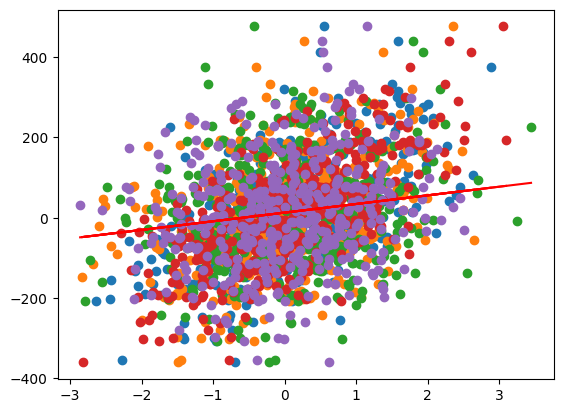

In [ ]:
for i in range(5):
    print(f'\nточность построенной модели {i} : {binary_1.score(x[[i]],y)}')
    plt.scatter(x[i], y)
    xx = np.linspace(x[i].min(), x[i].max(), 100).reshape((-1, 1))
    plt.plot(xx, binary.predict(xx), c='r')

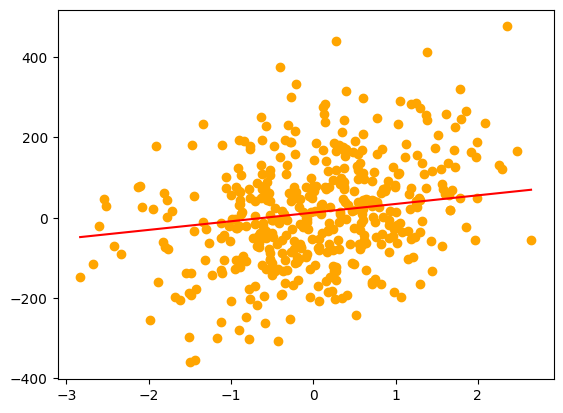

In [ ]:
plt.scatter(x[1], y, c='orange')
xx = np.linspace(x[1].min(), x[1].max(), 100).reshape((-1, 1))
plt.plot(xx, binary.predict(xx), c='r')

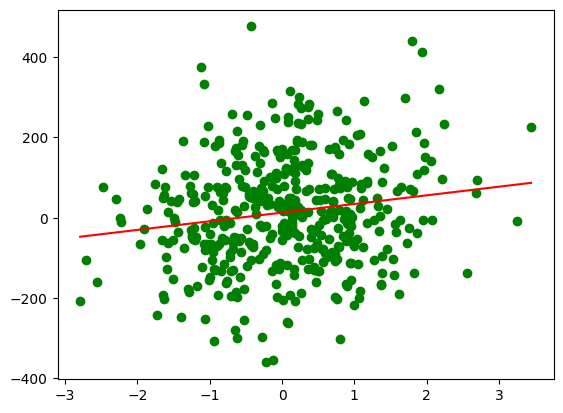

In [ ]:
plt.scatter(x[2], y, c='green')
xx = np.linspace(x[2].min(), x[2].max(), 100).reshape((-1, 1))
plt.plot(xx, binary.predict(xx), c='r')

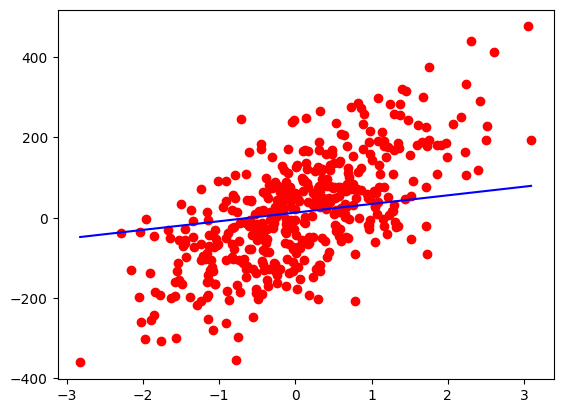

In [ ]:
plt.scatter(x[3], y, c='red')
xx = np.linspace(x[3].min(), x[3].max(), 100).reshape((-1, 1))
plt.plot(xx, binary.predict(xx), c='b')

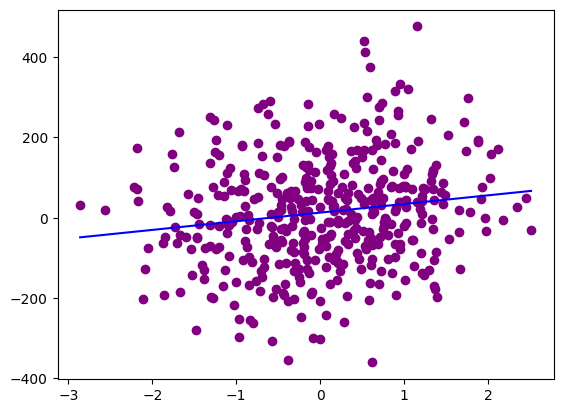

In [ ]:
plt.scatter(x[4], y, c='purple')
xx = np.linspace(x[4].min(), x[4].max(), 100).reshape((-1, 1))
plt.plot(xx, binary.predict(xx), c='b')

Используйте другие метрики качества регрессионной модели в дополнение к коэффициенту детерминации.

In [ ]:
yr=binary_1.predict(x[[1]])
from bokeh.plotting import figure, show, output_file
p=figure( width=450, height=300)
p.title.align = 'center'
p.circle(x[[1]], y)
p.line(x[[1]], y, line_width=3, line_alpha=0.4)
p.circle(x[[1]], yr, color="red")
p.line(x[[1]],yr, color="red",legend_label='Predicted Salary', line_width=3, line_alpha=0.4)
show(p)

RuntimeError: ignored

In [ ]:
s=0
for i in range(437):
      s+=float(y[0][i]-yr[i])
RMSE=np.sqrt(s**2/437)
RMSE

4.14676396578263e-14

In [ ]:
s=[]
for i in range(437):
      s.append(abs(float(y[0][i]-yr[i])))
MAE=np.mean(s)/437
MAE

0.2290080805120583

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
pf=PolynomialFeatures()
#Linear Equation of degree 2
X_poly=pf.fit_transform(x[1])
#binary_1.fit(X_poly, y)
yp=binary_1.predict(X_poly)

ValueError: ignored

(*) Замерьте время обучения полиномиальных моделей с разной степенью полинома. Сделайте вывод.

array([[[-1.02330755e+00,  1.04715835e+00],
        [-1.10838575e+00,  1.22851898e+00],
        [-2.13615380e+00,  4.56315305e+00],
        [-1.54958635e+00,  2.40121785e+00],
        [-1.08619268e+00,  1.17981454e+00],
        [-2.54209973e+00,  6.46227105e+00],
        [-2.35820493e-01,  5.56113047e-02],
        [-2.75026389e-01,  7.56395146e-02],
        [ 3.66380165e-01,  1.34234425e-01],
        [ 4.90892708e-01,  2.40975651e-01],
        [-5.76717395e-02,  3.32602954e-03],
        [ 2.26291825e+00,  5.12079900e+00],
        [ 1.65304419e+00,  2.73255508e+00],
        [ 3.78454105e-01,  1.43227510e-01],
        [ 2.73692021e-01,  7.49073222e-02],
        [-1.62593790e-01,  2.64367404e-02],
        [-2.49339057e-01,  6.21699654e-02],
        [-1.78268397e-01,  3.17796212e-02],
        [-8.94080890e-01,  7.99380638e-01],
        [ 3.81292915e-01,  1.45384287e-01],
        [-3.84404385e-01,  1.47766731e-01],
        [-4.71787951e-01,  2.22583871e-01],
        [ 1.38920929e-01,  1.929